# Outliers Impact On Machine Learning

## Which ML models are sensitive to outliers?
1. Naive Bayes Classifier --Not Sensitive    
2. SVM --Not Sensitive
3. Linear Regression --Sensitive
4. Logistic Regression --Sensitive
5. Decision Tree Regression or Classification --Not Sensitive
6. Ensemble ( RF, XGBoost, GB ) --Not Sensitive
7. KNN --Not Sensitive
8. Kmeans --Sensitive
9. Hierarchical --Sensitive
10. PCA --Very Sensitive
11. Neural Networks --Sensitive
12. LDA --Sensitive
13. DBSCAN --Sensitive

All Unsupervised ML algorithms are Sensitive to outliers

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

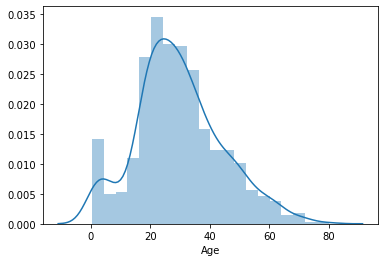

In [5]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

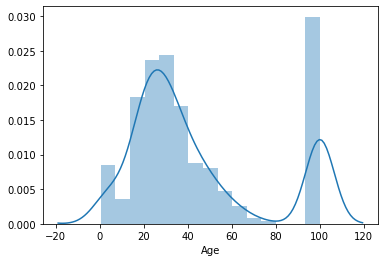

In [6]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passenger')

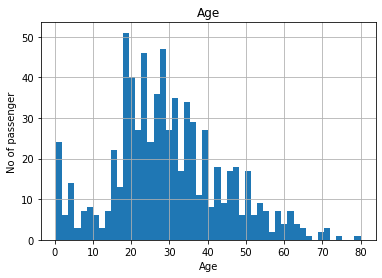

In [8]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

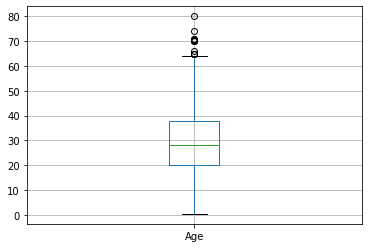

In [9]:
figure = df.boxplot(column = 'Age')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Assuming "Age" follows a Gaussian Distribution we will calculate the boundaries which differentiates the outliers
Any values that are present outside 3 standard deviations can be considered as outliers and will be discarded.



In [16]:
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()

In [18]:
upper_boundary, lower_boundary, df['Age'].mean()

(73.27860964406095, -13.88037434994331, 29.69911764705882)

## If the feature is skewed

Text(0, 0.5, 'No.of passengers')

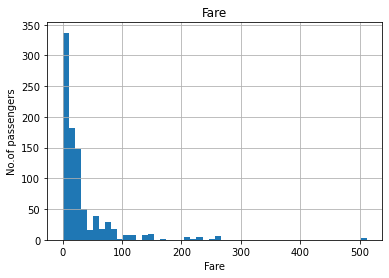

In [5]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No.of passengers')

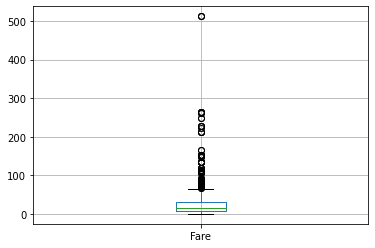

In [6]:
figure = df.boxplot(column = 'Fare')

In [8]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [9]:
IQR = df.Fare.quantile(.75) - df.Fare.quantile(.25)

In [10]:
IQR

23.0896

In [11]:
lower_bridge = df.Fare.quantile(.25) - 1.5*IQR
upper_bridge = df.Fare.quantile(.75) + 1.5*IQR
lower_bridge, upper_bridge

(-26.724, 65.6344)

In [12]:
# Extreme outliers
lower_bridge = df.Fare.quantile(.25) - 3*IQR
upper_bridge = df.Fare.quantile(.75) + 3*IQR
lower_bridge, upper_bridge

(-61.358399999999996, 100.2688)

In [15]:
data = df.copy()

In [17]:
data.loc[data['Age']>=73,'Age'] = 73

In [18]:
data.loc[data['Fare']>=100, 'Fare'] = 100

Text(0, 0.5, 'No.of passengers')

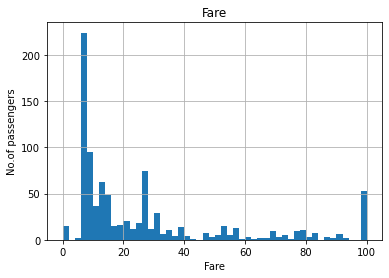

In [20]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No.of passengers')

Text(0, 0.5, 'No.of passengers')

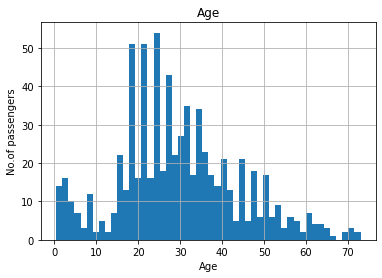

In [21]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No.of passengers')

## Model building

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size = .3)

In [29]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'roc_auc_score: {roc_auc_score(y_test, y_pred1[:,1])}')

Accuracy score: 0.6791044776119403
roc_auc_score: 0.7187572792918705


In [33]:
# Ensemble Technique

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'roc_auc_score: {roc_auc_score(y_test, y_pred1[:,1])}')

Accuracy score: 0.6977611940298507
roc_auc_score: 0.7302200034829047
